# ***Exploratory Data Analysis (EDA) : Sugarcane Production Dataset***

In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [102]:
url='https://raw.githubusercontent.com/GeeksforgeeksDS/EDA-Sugarcane-Project/main/List%20of%20Countries%20by%20Sugarcane%20Production.csv'
data=pd.read_csv(url)
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [103]:
df.shape

(103, 7)

# ***DATA CLEANING***

In [104]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.').str.replace('NaN','')


In [105]:
df.sample(4)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
47,47,Japan,Asia,1574000,12444,28901,54461.6
58,58,Congo-Brazzaville,Africa,687365,127292,20132,34142.4
63,63,Morocco,Africa,426503,12265,10434,40876.3
60,60,Angola,Africa,556094,19012,14255,39011.6


In [106]:
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)

In [107]:
df.head()

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [108]:
df.isnull().sum()

,0
ID,0
Country,0
Continent,0
Production(Tons),0
Production_per_Person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [109]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)


In [110]:
df.shape

(102, 7)

In [111]:
df.tail()

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,11949.8
101,102,Syria,Asia,1,0,0,83034.2


In [112]:
df.dtypes

,0
ID,int64
Country,object
Continent,object
Production(Tons),object
Production_per_Person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [113]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)
df.shape

(102, 7)

In [114]:
df.dtypes

,0
ID,int64
Country,object
Continent,object
Production(Tons),float64
Production_per_Person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [115]:
df.nunique()

,0
ID,102
Country,102
Continent,6
Production(Tons),102
Production_per_Person(Kg),101
Acreage(Hectare),101
Yield(Kg/Hectare),102


# ***Univariate Analysis***

In [116]:
df.head()

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# How many Countries produce sugarcane from each contient

In [117]:
df['Continent'].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


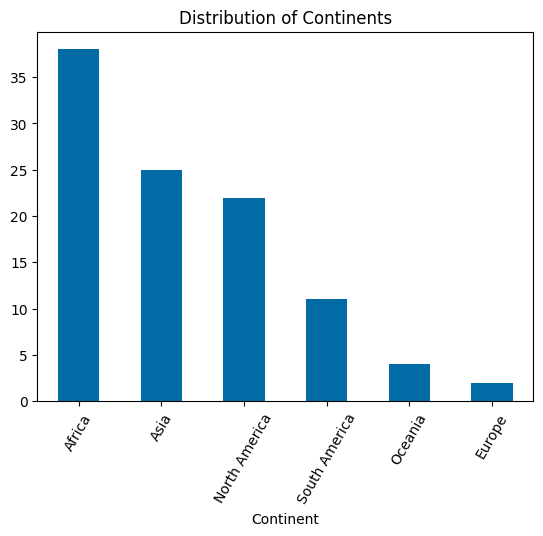

In [118]:
df['Continent'].value_counts().plot(kind='bar')
plt.style.use('tableau-colorblind10')
plt.title('Distribution of Continents')
plt.xticks(rotation=60)
plt.show()

# ***Distrbution of Columns***

<ipython-input-119-602b00cc253a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acreage(Hectare)'], bins=30, kde=True, color='blue')
<ipython-input-119-602b00cc253a>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Kg/Hectare)'],  bins=50, kde=True, color='purple')


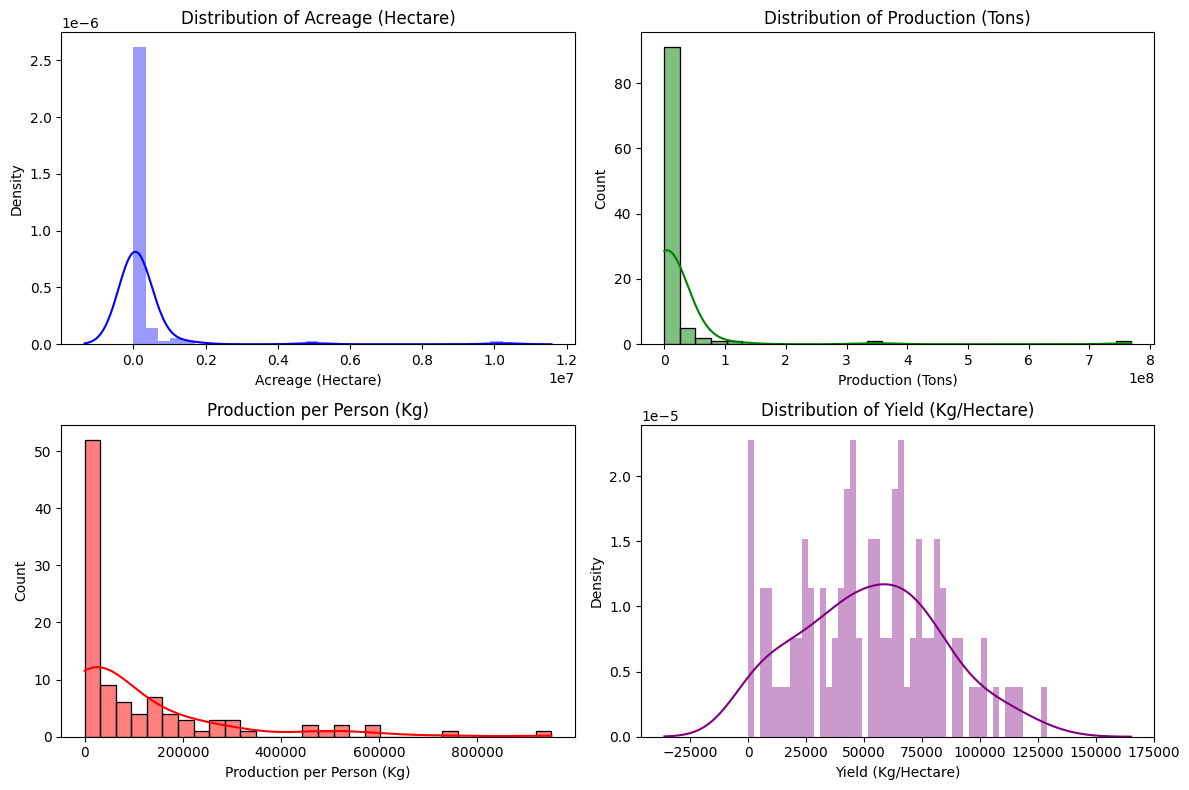

In [119]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.distplot(df['Acreage(Hectare)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Acreage (Hectare)')
plt.xlabel('Acreage (Hectare)')

plt.subplot(2, 2, 2)
sns.histplot(df['Production(Tons)'], bins=30, kde=True, color='green')
plt.title('Distribution of Production (Tons)')
plt.xlabel('Production (Tons)')

plt.subplot(2, 2, 3)
sns.histplot(df['Production_per_Person(Kg)'], bins=30, kde=True, color='red')
plt.title('Production per Person (Kg)')
plt.xlabel('Production per Person (Kg)')


plt.subplot(2, 2, 4)
sns.distplot(df['Yield(Kg/Hectare)'],  bins=50, kde=True, color='purple')
plt.title('Distribution of Yield (Kg/Hectare)')
plt.xlabel('Yield (Kg/Hectare)')

plt.tight_layout()
plt.show()


# **Checking Outliers**

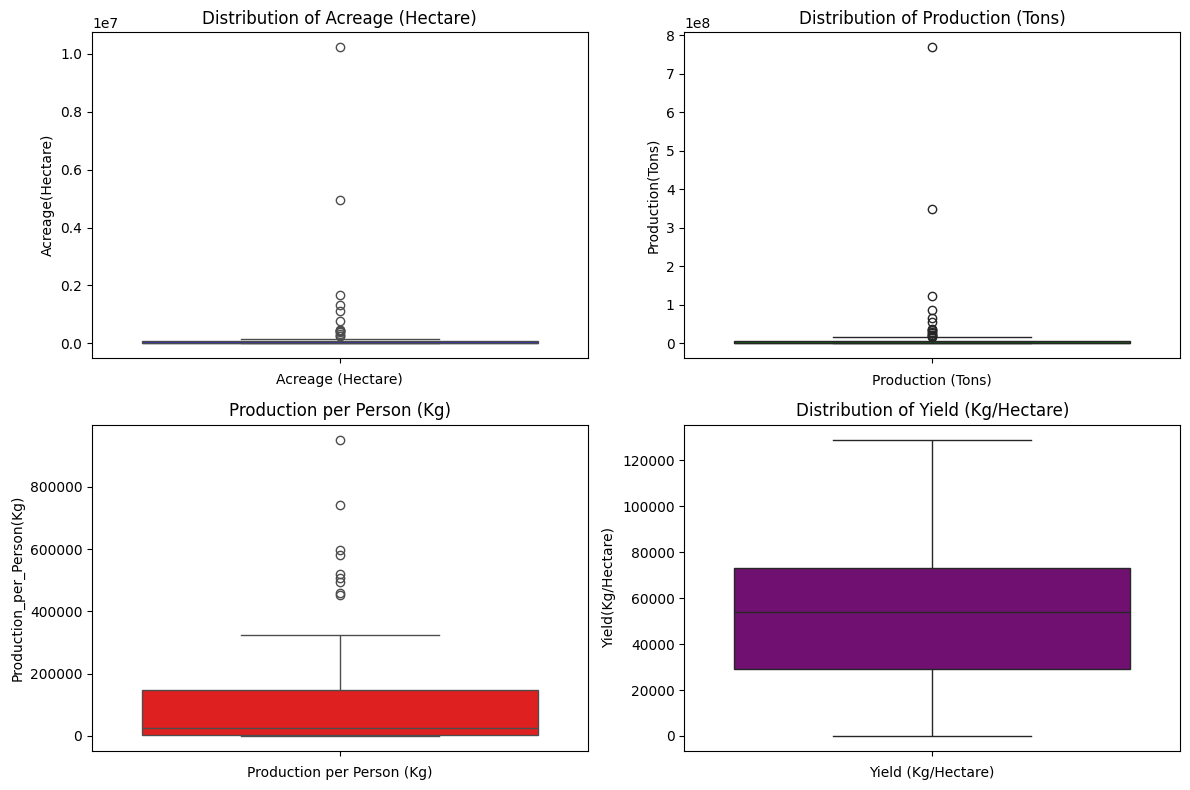

In [120]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.boxplot(df['Acreage(Hectare)'], color='blue')
plt.title('Distribution of Acreage (Hectare)')
plt.xlabel('Acreage (Hectare)')

plt.subplot(2, 2, 2)
sns.boxplot(df['Production(Tons)'],  color='green')
plt.title('Distribution of Production (Tons)')
plt.xlabel('Production (Tons)')

plt.subplot(2, 2, 3)
sns.boxplot(df['Production_per_Person(Kg)'], color='red')
plt.title('Production per Person (Kg)')
plt.xlabel('Production per Person (Kg)')


plt.subplot(2, 2, 4)
sns.boxplot(df['Yield(Kg/Hectare)'],  color='purple')
plt.title('Distribution of Yield (Kg/Hectare)')
plt.xlabel('Yield (Kg/Hectare)')

plt.tight_layout()
plt.show()


In [121]:
df.describe()

,ID,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,50.529412,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,29.638985,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,0.000000,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.250000,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,50.500000,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,75.750000,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# **Bivariate Analysis**

In [122]:
df.head()

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# **Which Contries Produce  Maximum Sugarcane ?**

In [123]:
df_new=df[['Country','Production(Tons)']]
df_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
99,Singapore,50.0
100,Samoa,12.0


In [124]:
df_new['Production(Tons)_percent']=df['Production(Tons)']*100/df['Production(Tons)'].sum()
df_new

<ipython-input-124-18d7557703a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Production(Tons)_percent']=df['Production(Tons)']*100/df['Production(Tons)'].sum()


,Country,Production(Tons),Production(Tons)_percent
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
99,Singapore,50.0,2.649176e-06
100,Samoa,12.0,6.358022e-07


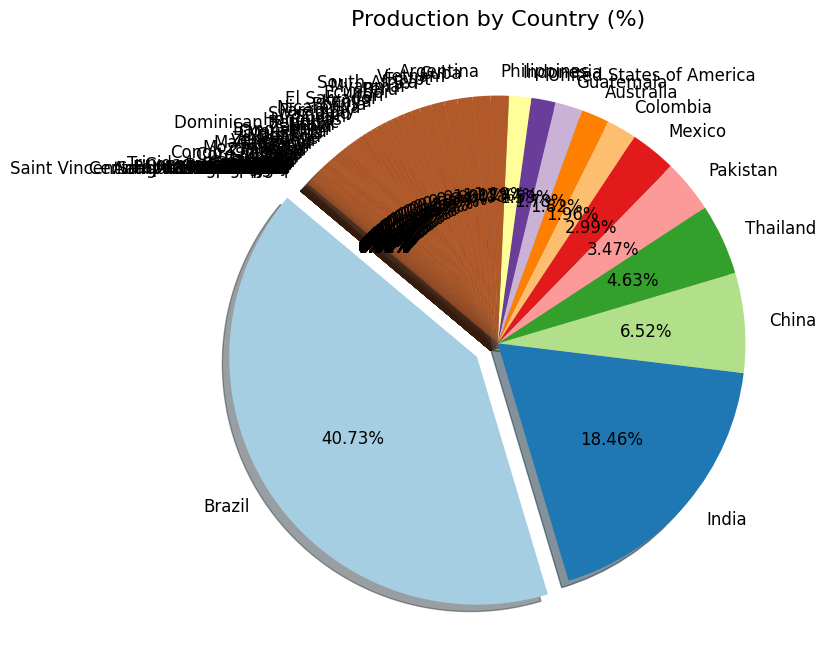

In [125]:
colors = plt.cm.Paired(range(len(df_new)))

explode = [0.1 if val == df_new['Production(Tons)_percent'].max() else 0 for val in df_new['Production(Tons)_percent']]


plt.figure(figsize=(8, 7))
df_new['Production(Tons)_percent'].plot(
    kind='pie',
    labels=df_new['Country'],
    autopct='%.2f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=colors,
    labeldistance=1.1,
    textprops={'fontsize': 12}
)

plt.title('Production by Country (%)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Thailand'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Colombia'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Guatemala'),
  Text(9, 0, 'United States of America')])

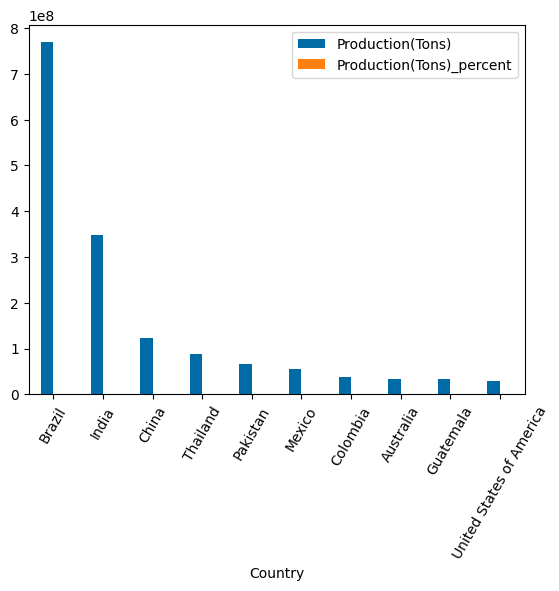

In [126]:
df_new.head(10).plot(kind='bar',x='Country')
plt.xticks(rotation=60)


                                                 Country

**Higest Sugarcane Production Country**

In [127]:
df_produ=df.sort_values('Production(Tons)',ascending=False)
df_produ.head(10)

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


<ipython-input-128-bde16c9dc931>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_produ.head(10),x='Country',y='Production(Tons)',palette='viridis')
<ipython-input-128-bde16c9dc931>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=70)


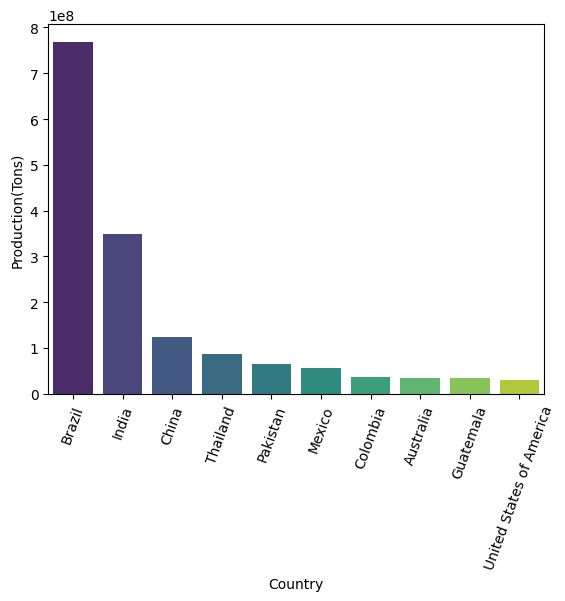

In [128]:

ax=sns.barplot(data=df_produ.head(10),x='Country',y='Production(Tons)',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

**Which Country Own By Highest Land**

In [129]:
df_hect=df.sort_values('Acreage(Hectare)',ascending=False)
df_hect

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394.0,8.000,9.0,43596.5
98,98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,100,Singapore,Asia,50.0,9.000,2.0,25.0
100,101,Samoa,Oceania,12.0,6.000,1.0,11949.8


<ipython-input-130-956d7e031829>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_hect.head(10),x='Country',y='Acreage(Hectare)',palette='viridis')
<ipython-input-130-956d7e031829>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=70)


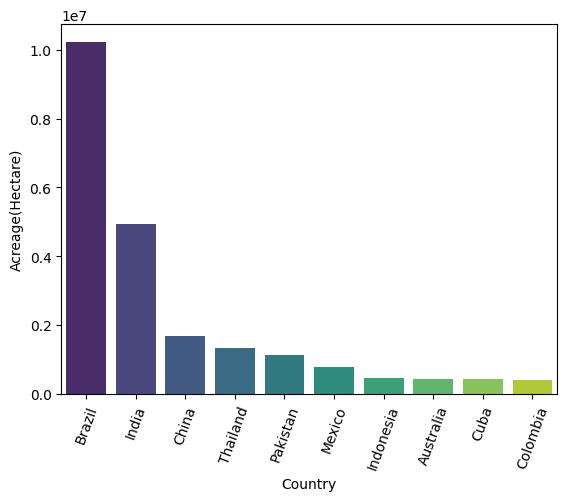

In [130]:
ax=sns.barplot(data=df_hect.head(10),x='Country',y='Acreage(Hectare)',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

**Which Country has Highest yield per Hectare**

In [131]:
df_yield=df.sort_values('Yield(Kg/Hectare)',ascending=False)
df_yield

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
8,8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
57,57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
15,15,Egypt,Africa,15760418.0,161651.000,137011.0,115030.6
18,18,Peru,South America,9832526.0,314768.000,87696.0,112120.2
40,40,Malawi,Africa,2915406.0,162584.000,27087.0,107629.5
...,...,...,...,...,...,...,...
88,88,Saint Lucia,North America,10.0,55915.000,125.0,80.0
55,55,Trinidad and Tobago,North America,810.0,597066.000,15.0,54.0
99,100,Singapore,Asia,50.0,9.000,2.0,25.0
87,87,Iraq,Asia,1167.0,297.000,584.0,20.0


<ipython-input-132-54c61825cef7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)',palette='magma')
<ipython-input-132-54c61825cef7>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


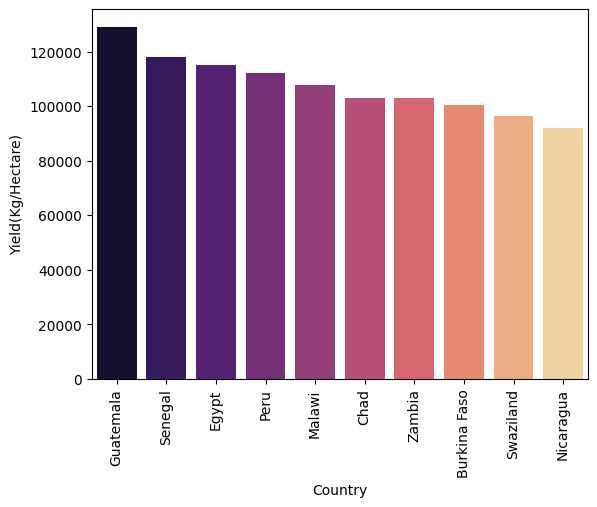

In [132]:
ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)',palette='magma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

***Which Country Highest Production***

In [133]:
df_perPerson=df.sort_values('Production_per_Person(Kg)',ascending=False)
df_perPerson.head()

,ID,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
25,25,Paraguay,South America,6708000.0,951087.0,120.0,559.0
6,6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5
55,55,Trinidad and Tobago,North America,810.0,597066.0,15.0,54.0
42,42,Panama,North America,2419638.0,581814.0,37995.0,63683.1
51,51,Jamaica,North America,1422432.0,521254.0,26255.0,54178.2


<ipython-input-134-82c2710bef84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_perPerson.head(10),x='Country',y='Production_per_Person(Kg)',palette='magma')
<ipython-input-134-82c2710bef84>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


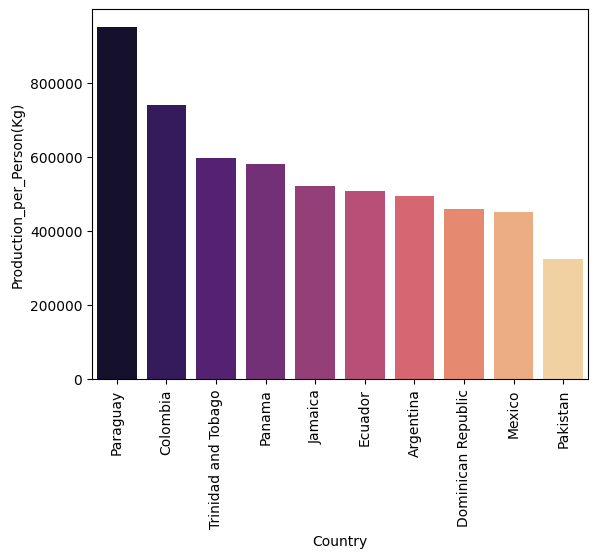

In [134]:
ax=sns.barplot(data=df_perPerson.head(10),x='Country',y='Production_per_Person(Kg)',palette='magma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# ***Correlation***

# **Do Countries With Highest Land Produce more sugarcane?**

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

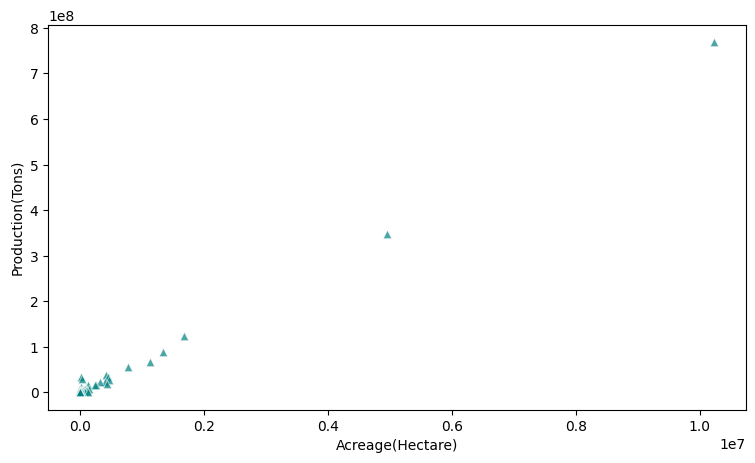

In [135]:
plt.figure(figsize=(9,5))
plt.style.use('tableau-colorblind10')
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)',alpha=0.7,marker='^',color='teal')

# **Do countries which yiled more sugarcane per hectare produces more sugarcane in total**

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

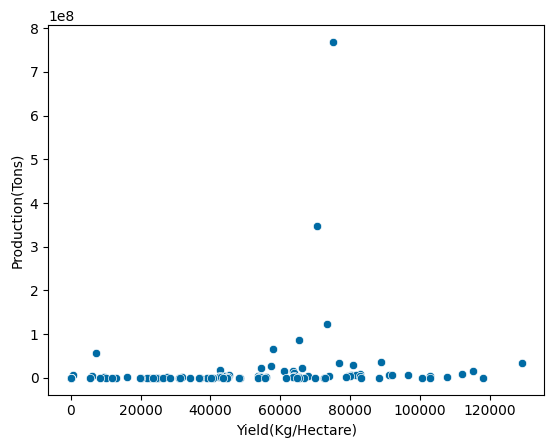

In [136]:
sns.scatterplot(data=df,x='Yield(Kg/Hectare)',y='Production(Tons)')

# **Analysis for Contient **

In [137]:
df_contient=df.groupby('Continent').sum()
df_contient

,ID,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,,
Africa,2061,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,1253,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,189,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,1101,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,227,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,323,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


<Axes: xlabel='Continent'>

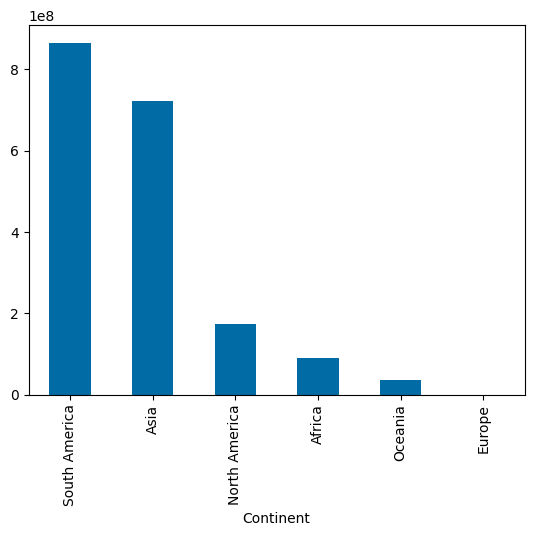

In [138]:
df_contient['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

# **How much country in the cotient **

<Axes: ylabel='count'>

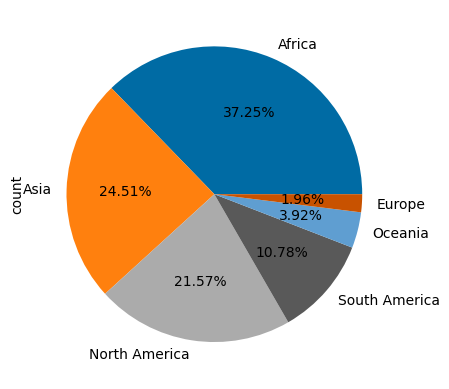

In [139]:
df['Continent'].value_counts().plot(kind='pie',autopct='%.2f%%')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'Europe')])

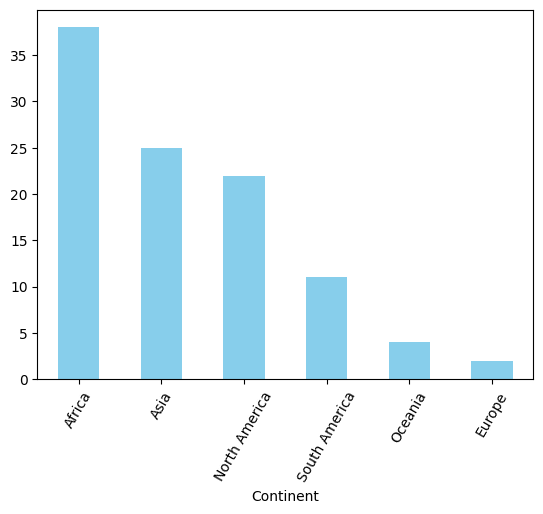

In [140]:
df['Continent'].value_counts().plot(kind='bar',  color='skyblue')
plt.xticks(rotation=60)

# **Do number of contries in a contient effects of production of sugarcane**

In [141]:
df_contient['number_of_countries']=df.groupby('Continent').count()['Country']
df_contient


,ID,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,,
Africa,2061,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,1253,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,189,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,1101,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,227,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,323,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


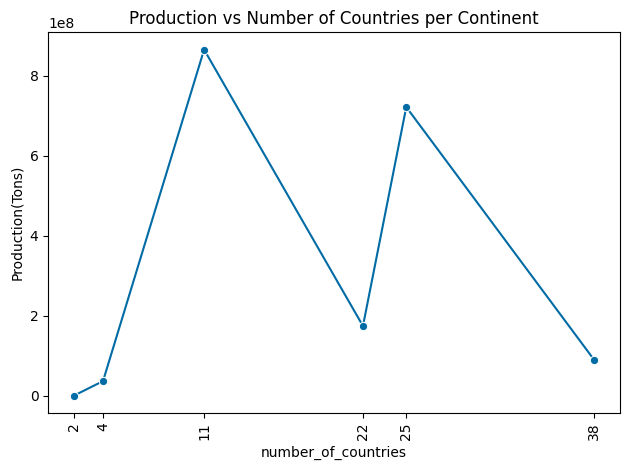

In [142]:
sns.lineplot(data=df_contient, x='number_of_countries', y='Production(Tons)', marker='o')

plt.xticks(df_contient['number_of_countries'],rotation=90)

plt.title('Production vs Number of Countries per Continent')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Production by Continent'}>

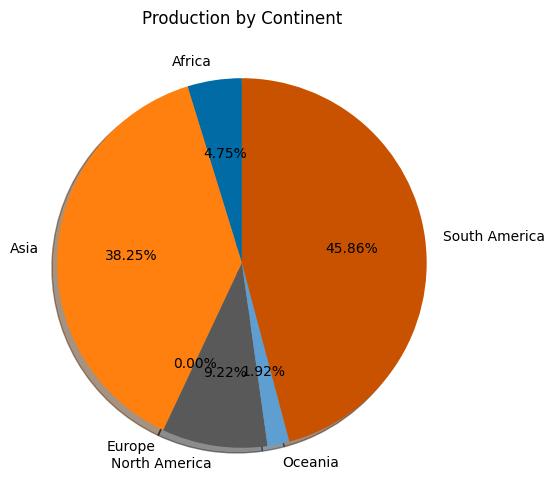

In [143]:

df_contient['Production(Tons)'].plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(6, 6),
    shadow=True,
    startangle=90,
    ylabel='',  # removes y-axis label
    title='Production by Continent'
)

In [144]:
from ydata_profiling import ProfileReport
import matplotlib

In [145]:
profile=ProfileReport(df,explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 64.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]